In [3]:
# Basic import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
##Preparing dependent and independent features

X = df.drop(columns=['math score'],axis=1)

In [6]:
y=df['math score']

In [7]:
## Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)



In [8]:
X=preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
##Separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [13]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [15]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "Catboosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    ##Evaluate and test dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print("- RMSE : {:.4f}".format(model_train_rmse))
    print("- MAE : {:.4f}".format(model_train_mae))
    print("- R2_score: {:.4f}".format(model_train_r2))

    print('-----------------------------------')

    print('Model performance for test set')
    print("- RMSE : {:.4f}".format(model_test_rmse))
    print("- MAE : {:.4f}".format(model_test_mae))
    print("- R2_score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')





Linear Regression
Model performance for training set
- RMSE : 5.3274
- MAE : 4.2788
- R2_score: 0.8741
-----------------------------------
Model performance for test set
- RMSE : 5.4096
- MAE : 4.2259
- R2_score: 0.8797


Lasso
Model performance for training set
- RMSE : 6.5938
- MAE : 5.2063
- R2_score: 0.8071
-----------------------------------
Model performance for test set
- RMSE : 6.5197
- MAE : 5.1579
- R2_score: 0.8253


Ridge
Model performance for training set
- RMSE : 5.3233
- MAE : 4.2650
- R2_score: 0.8743
-----------------------------------
Model performance for test set
- RMSE : 5.3904
- MAE : 4.2111
- R2_score: 0.8806


K-Neighbors Regressor
Model performance for training set
- RMSE : 5.7122
- MAE : 4.5187
- R2_score: 0.8553
-----------------------------------
Model performance for test set
- RMSE : 7.2516
- MAE : 5.6160
- R2_score: 0.7839


Decision Tree
Model performance for training set
- RMSE : 0.2795
- MAE : 0.0187
- R2_score: 0.9997
---------------------------------

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879740
8,AdaBoost,0.852901
5,Random Forest Regressor,0.851885
7,Catboosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.734937


In [17]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


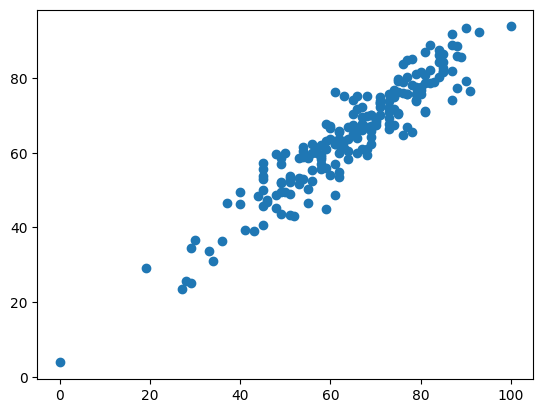

In [18]:
plt.scatter(y_test,y_pred)